In [4]:
import pandas as pd
import numpy as np
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import copy
from tqdm import tqdm
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
import scipy.stats as stats
from sklearn.feature_selection import f_regression


BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
F_REGRESSION_RESULTS = BLOOD_MICROBIOME_DIR + 'results/f_regression/f_regression_results.csv'
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)

MICROBE_FILE = BLOOD_MICROBIOME_DIR + 'data/kraken_align/microbe_filtered_species.tsv'

df_microbe = pd.read_table(MICROBE_FILE, index_col=0).transpose()

In [5]:
f_regress_results = pd.read_csv(F_REGRESSION_RESULTS, header=None)
f_regress_results.drop(0, inplace=True, axis=1)
f_regress_results.columns = ['name', 'exog_value', 'coeff']
f_regress_results['coeff_abs'] = abs(f_regress_results.coeff)

In [16]:
set(df_microbe.columns).difference((set(f_regress_results[['sequencing_plate' in c for c in f_regress_results.exog_value]].name)))

{'Human betaherpesvirus 6A',
 'Human betaherpesvirus 6B',
 'Human betaherpesvirus 7',
 'Human erythrovirus V9',
 'Human mastadenovirus C',
 'Human respirovirus 3',
 'Lactococcus virus c2',
 'Murine leukemia virus',
 'Natronomonas sp. C90',
 'Primate erythroparvovirus 1',
 'Primate erythroparvovirus 3',
 'Pseudomonas tolaasii',
 'Squirrel monkey retrovirus',
 'Torque teno virus 13',
 'Torque teno virus 15',
 'Torque teno virus 20',
 'Torque teno virus 21',
 'Torque teno virus 24',
 'Torque teno virus 7',
 'Torque teno virus 8'}

In [100]:
males = df_microbe.index[bam_mappings.loc[df_microbe.index].sex_numeric=='1.0']
females = df_microbe.index[bam_mappings.loc[df_microbe.index].sex_numeric=='2.0']
df_sex = df_microbe[f_regress_results[['sex' in f for f in f_regress_results.exog_value]].sort_values(
    'coeff_abs', ascending=False)[['name']].drop_duplicates().name]
print(len(df_sex.columns))

166


In [85]:
asd = df_microbe.index[bam_mappings.loc[df_microbe.index].derived_affected_status=='autism']
nt = df_microbe.index[(bam_mappings.loc[df_microbe.index].derived_affected_status!='autism') & (bam_mappings.loc[df_microbe.index].relationship=='sibling')]
df_asd = df_microbe[f_regress_results[['autism' in f for f in f_regress_results.exog_value]].sort_values(
    'coeff_abs', ascending=False)[['name']].drop_duplicates().name]
print(np.shape(df_asd))

(4569, 20)


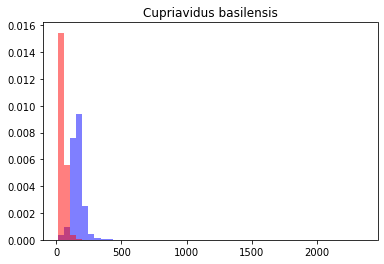

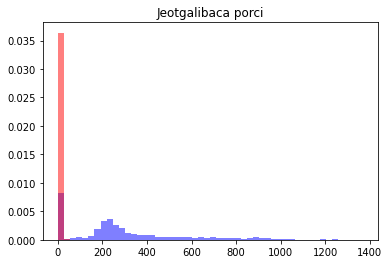

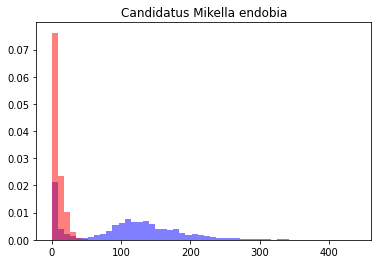

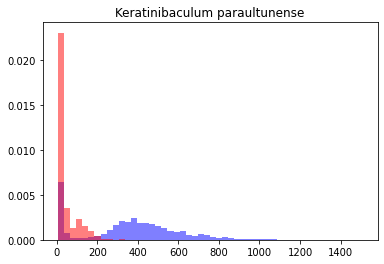

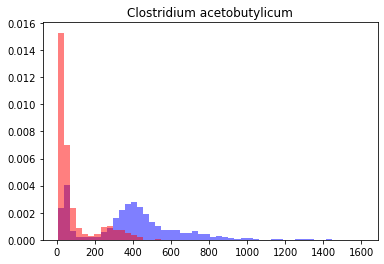

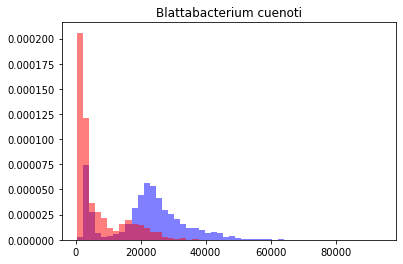

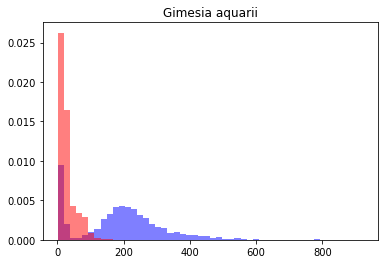

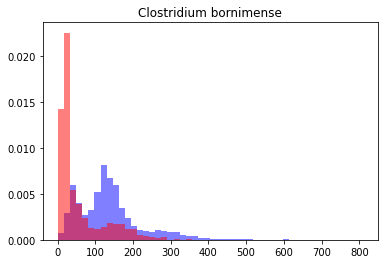

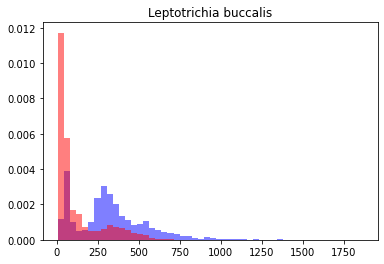

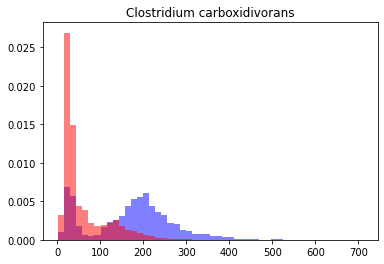

In [86]:
for c in df_sex.columns[:10]:
    n = plt.hist(df_sex[c].loc[males], alpha=0, density=True, bins=50)
    plt.hist(df_sex[c].loc[males], alpha=.5, bins=n[1], density=True, color='blue')
    plt.hist(df_sex[c].loc[females], alpha=.5, bins= n[1], density=True, color='red')
    plt.title(c)
    plt.show()

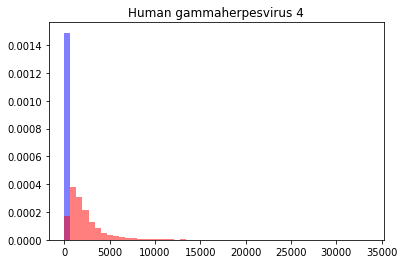

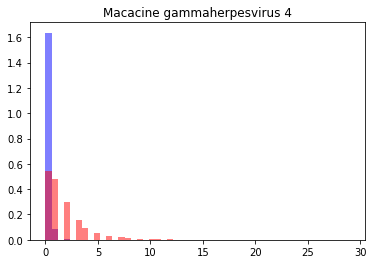

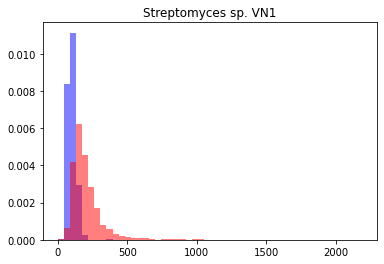

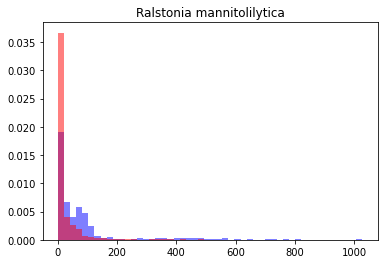

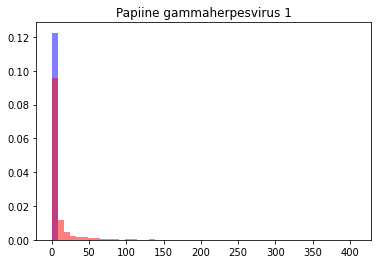

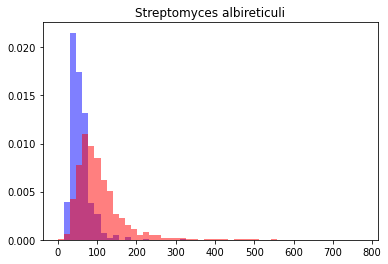

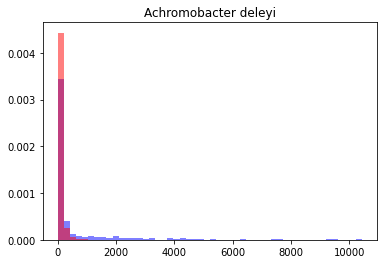

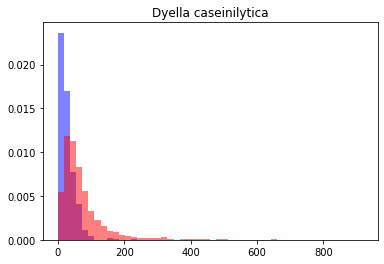

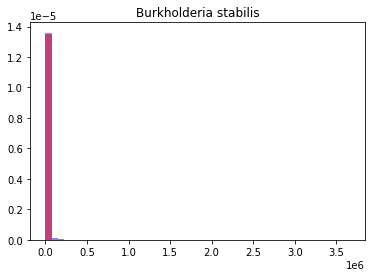

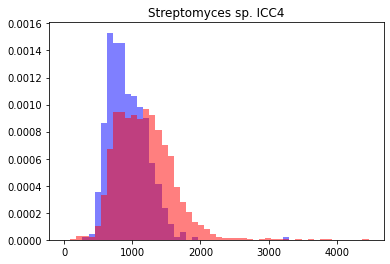

In [87]:
wb = df_microbe.index[bam_mappings.loc[df_microbe.index].bio_seq_source=='WB']
lcl = df_microbe.index[bam_mappings.loc[df_microbe.index].bio_seq_source=='LCL']
df_wb = df_microbe[f_regress_results[['WB' in f for f in f_regress_results.exog_value]].sort_values(
    'coeff_abs', ascending=False)[['name']].drop_duplicates().name]
for c in df_wb.columns[:10]:
    plt.figure()
    n = plt.hist(df_wb[c], alpha=0, density=True, bins=50)
    plt.hist(df_wb[c].loc[wb], alpha=.5, bins=n[1], density=True, color='blue')
    plt.hist(df_wb[c].loc[lcl], alpha=.5, bins= n[1], density=True, color='red')
    plt.title(c)

In [88]:
sibling = df_microbe.index[bam_mappings.loc[df_microbe.index].relationship=='sibling']
parent = df_microbe.index[bam_mappings.loc[df_microbe.index].relationship!='sibling']
df_sibling = df_microbe[f_regress_results[['child' in f for f in f_regress_results.exog_value]].sort_values(
    'coeff_abs', ascending=False)[['name']].drop_duplicates().name]
print(len(df_sibling.columns))

11


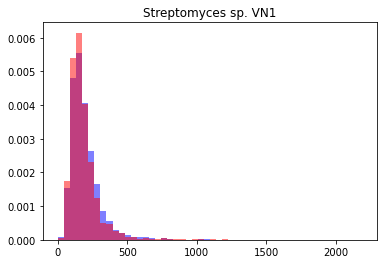

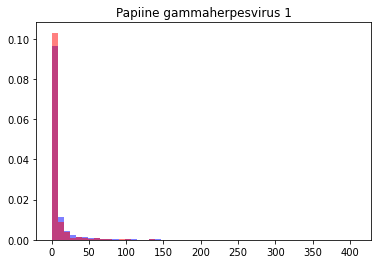

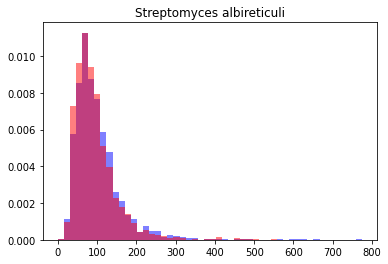

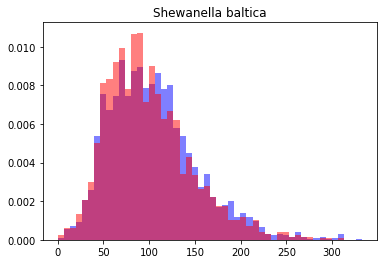

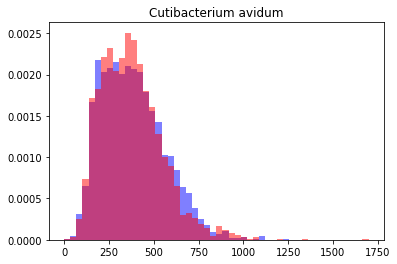

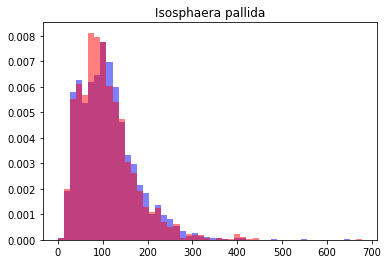

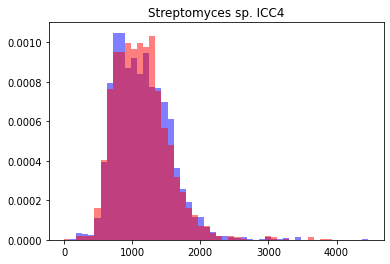

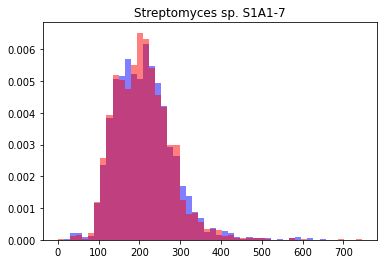

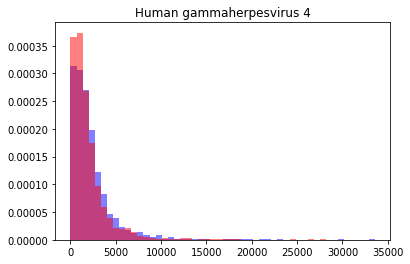

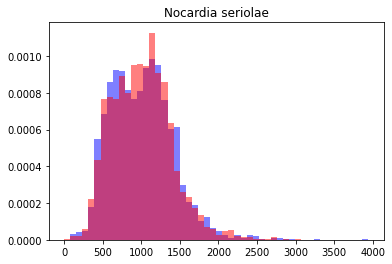

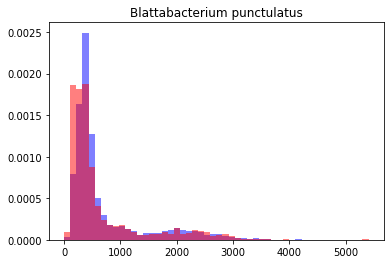

In [89]:
for c in df_sibling.columns:
    plt.figure()
    n = plt.hist(df_sibling[c], alpha=0, density=True, bins=50)
    plt.hist(df_sibling[c].loc[sibling], alpha=.5, bins=n[1], density=True, color='blue')
    plt.hist(df_sibling[c].loc[parent], alpha=.5, bins= n[1], density=True, color='red')
    plt.title(c)